In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma
from scipy.fft import fft, ifft

In [2]:
# X1 ~ Exp(1), X2 ~ Exp(1), X3 ~ Exp(1), all independent
# Y = X1 + X2 + X3
# What is the distribution of Y?

xvals = np.linspace(0, 100, 1000)
y1 = expon.pdf(xvals, scale=1)
Y1 = fft(y1)

In [3]:
Y1[:10]

array([10.49834028-0.j        , 10.45913467-0.62407829j,
       10.34334268-1.23362026j, 10.15623058-1.81519585j,
        9.90592438-2.35741519j,  9.60257043-2.85156277j,
        9.2573913 -3.2918759j ,  8.88178459-3.6754865j ,
        8.48657536-4.00210066j,  8.08148067-4.27351646j])

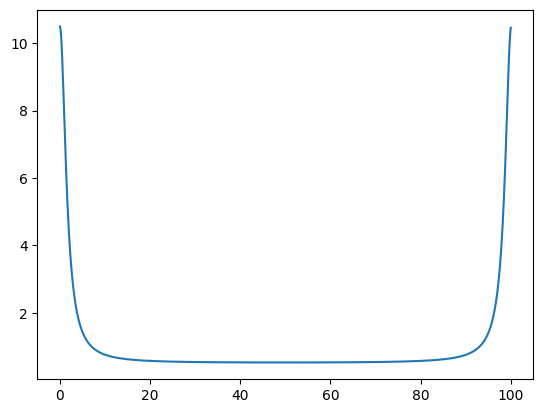

In [4]:
plt.plot(xvals, Y1.real);

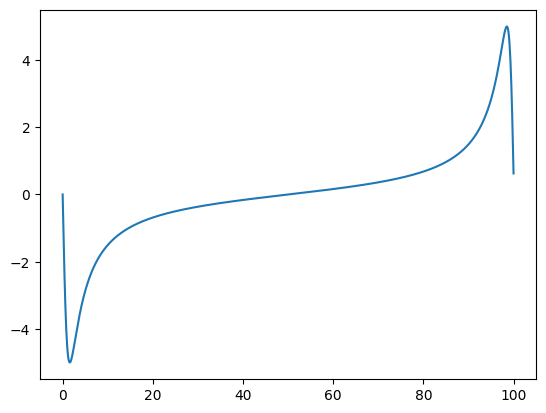

In [5]:
plt.plot(xvals, Y1.imag);

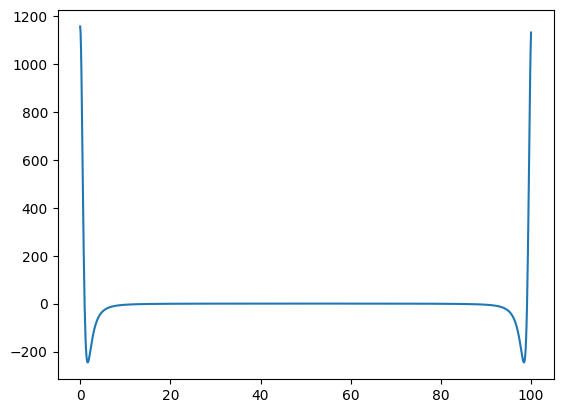

In [6]:
Y = Y1 * Y1 * Y1
plt.plot(xvals, Y.real);

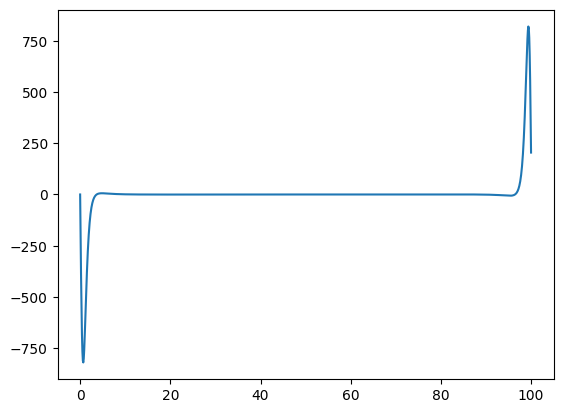

In [7]:
plt.plot(xvals, Y.imag);

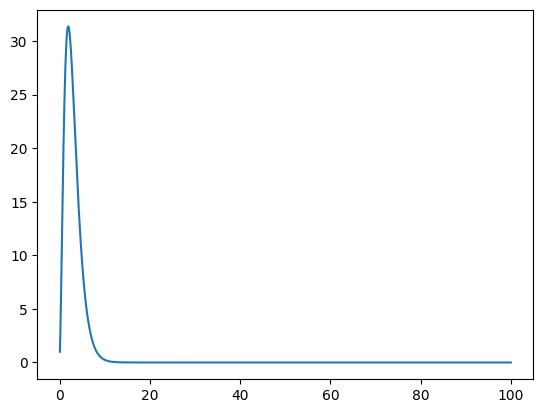

In [8]:
# convert back to a probability distribution
y = ifft(Y).real
plt.plot(xvals, y);

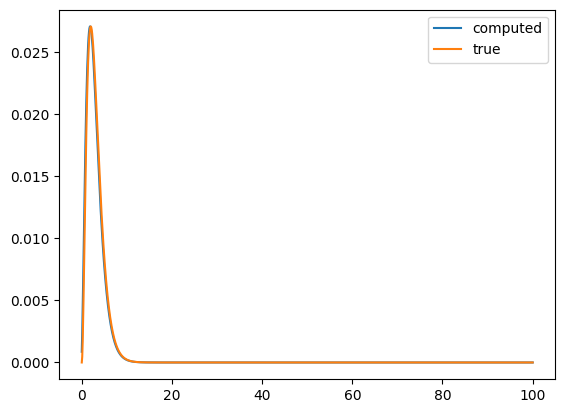

In [9]:
# theoretical answer

# CF of X1 is 1/(1-it)
# CF of X1+X2+X3 is [1/(1-it)]^3

# Same as CF for Gamma with α=3, β=1 (also Erlang)
z = gamma.pdf(xvals, a=3, scale=1)
plt.plot(xvals, y / y.sum(), label='computed');
plt.plot(xvals, z / z.sum(), label='true');
plt.legend();

# note: we divide by the sum because there are some scaling constants
# in the actual Fourier transform

In [10]:
from scipy.signal import convolve

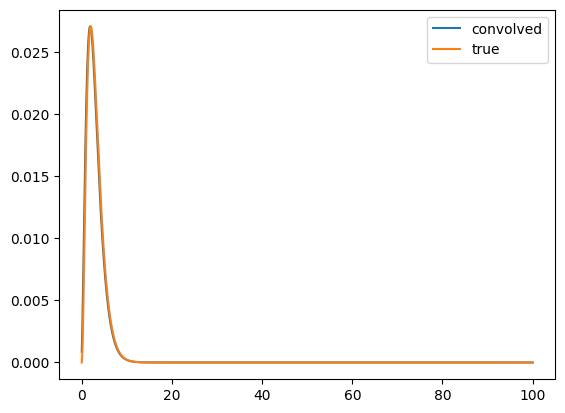

In [11]:
yc = convolve(convolve(y1, y1), y1)
yc = yc[:len(xvals)] # since the result of convolution has length ~T1 + T2
plt.plot(xvals, yc / yc.sum(), label='convolved');
plt.plot(xvals, z / z.sum(), label='true');
plt.legend();

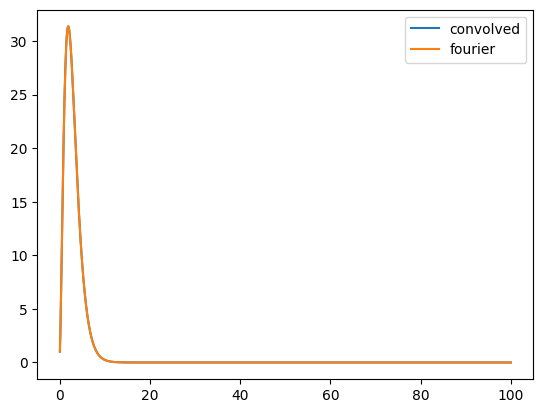

In [12]:
plt.plot(xvals, yc, label='convolved');
plt.plot(xvals, y, label='fourier');
plt.legend();

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=L5rVabHObBsRpryYTp-FxQ&n=Generating+Functions)